In [44]:
from sympy import symbols, sin, cos, simplify, pi, lambdify, expand
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Declare symbols
x, eta, delta = symbols('x η δ', real=True)


In [45]:
# h1h1
P_h1h1 = (1/8) * (1 + cos(x))**2
Pp_h1h1 = (1/8) * (1 + eta**2)**2 * cos(x/2)**4 * (2 / (1 + eta))**2

# v1v1
P_v1v1 = (1/8) * (1 - cos(x))**2
Pp_v1v1 = (1/8) * (1 + eta**2)**2 * sin(x/2)**4 * (2 / (1 + eta))**2

# h1v1
P_h1v1 = (1/4) * sin(x)**2 * cos((delta))**2
Pp_h1v1 = (1/16) * (1 + eta**4 + 2 * eta**2 * cos(2*delta)) * sin(x)**2

# h1v2
P_h1v2 = (1/4) * sin(x)**2 * sin(delta)**2
Pp_h1v2 = (1/4) * sin(x/2)**2 * cos(x/2)**2 * (1 + eta**4 - 2 * eta**2 * cos(2*delta))

# h1h2
P_h1h2 = 0 * eta
Pp_h1h2 = (1/4) * (eta**2 - 1)**2 * cos(x/2)**4

# v1v2
P_v1v2 = 0 * eta
Pp_v1v2 = (1/4) * (eta**2 - 1)**2 * sin(x/2)**4


Pp_h1h2

0.25*(η**2 - 1)**2*cos(x/2)**4

In [46]:
# expand and simplify the expressions
P_h1h1 = simplify(P_h1h1.expand(trig=True))
Pp_h1h1 = simplify(Pp_h1h1.expand(trig=True))
P_h1v1 = simplify(P_h1v1.expand(trig=True))
Pp_h1v1 = simplify(Pp_h1v1.expand(trig=True))
P_h1v2 = simplify(P_h1v2.expand(trig=True))
Pp_h1v2 = simplify(Pp_h1v2.expand(trig=True))
P_h1h2 = simplify(P_h1h2.expand(trig=True))
Pp_h1h2 = simplify(Pp_h1h2.expand(trig=True))
P_v1v1 = simplify(P_v1v1.expand(trig=True))
Pp_v1v1 = simplify(Pp_v1v1.expand(trig=True))
P_v1v2 = simplify(P_v1v2.expand(trig=True))
Pp_v1v2 = simplify(Pp_v1v2.expand(trig=True))

P_h1h1

0.125*(cos(x) + 1)**2

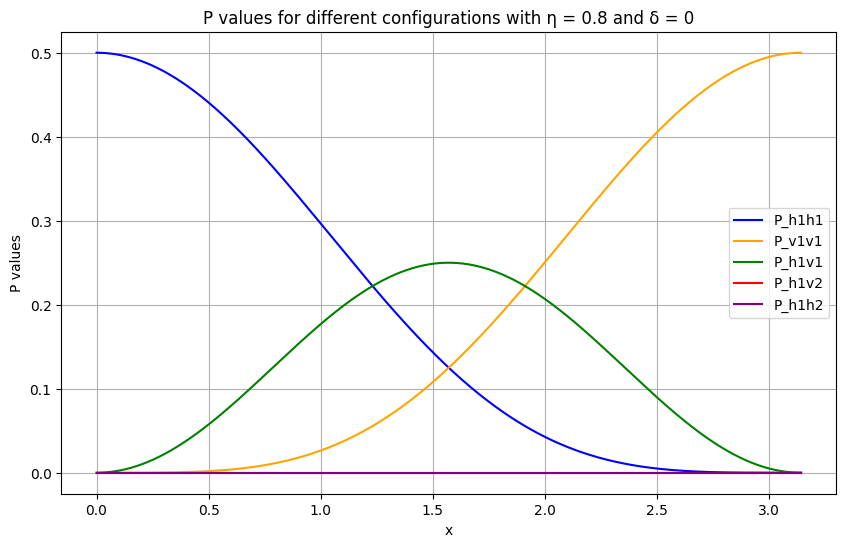

In [47]:
eta_value = 0.8  # Set eta value for numerical evaluation
delta_value = 0  # Set delta value for numerical evaluation

# plot all the P values between 0 and pi

# Lambdify for numerical evaluation of all P values
from sympy.utilities.lambdify import lambdify

# sub eta and delta values for numerical evaluation
f_h1h1 = lambdify(x, P_h1h1.subs(eta, eta_value), modules='numpy')
f_v1v1 = lambdify(x, P_v1v1.subs(eta, eta_value), modules='numpy')
f_h1v1 = lambdify(x, P_h1v1.subs({eta: eta_value, delta: delta_value}), modules='numpy')
f_h1v2 = lambdify(x, P_h1v2.subs({eta: eta_value, delta: delta_value}), modules='numpy')
f_h1h2 = lambdify(x, P_h1h2.subs(eta, eta_value), modules='numpy')

# Generate data for all P values
x_vals = np.linspace(0, np.pi, 500)
y_h1h1 = f_h1h1(x_vals)
y_v1v1 = f_v1v1(x_vals)
y_h1v1 = f_h1v1(x_vals) 
y_h1v2 = np.zeros(x_vals.shape)  # P_h1v2 is zero for all x
y_h1h2 = np.zeros(x_vals.shape)  # P_h1h2 is zero for all x

# Plot all P values
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_h1h1, label='P_h1h1', color='blue')
plt.plot(x_vals, y_v1v1, label='P_v1v1', color='orange')
plt.plot(x_vals, y_h1v1, label='P_h1v1', color='green')
plt.plot(x_vals, y_h1v2, label='P_h1v2', color='red')
plt.plot(x_vals, y_h1h2, label='P_h1h2', color='purple')
plt.xlabel('x')
plt.ylabel('P values')
plt.title('P values for different configurations with η = 0.8 and δ = 0')
plt.legend()
plt.grid(True)
plt.show()


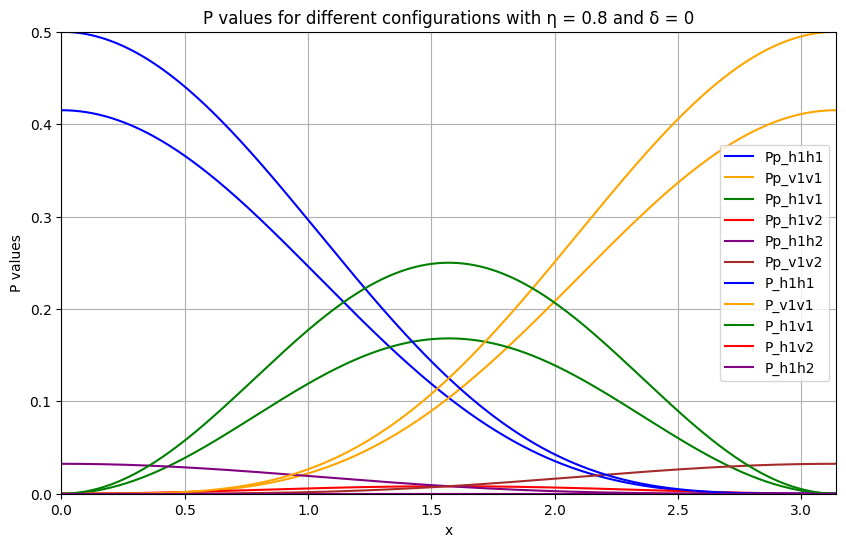

In [48]:
eta_value = 0.8  # Set eta value for numerical evaluation
delta_value = 0  # Set delta value for numerical evaluation

# sub eta and delta values for numerical evaluation
fp_h1h1 = lambdify(x, Pp_h1h1.subs(eta, eta_value), modules='numpy')
fp_v1v1 = lambdify(x, Pp_v1v1.subs(eta, eta_value), modules='numpy')
fp_h1v1 = lambdify(x, Pp_h1v1.subs({eta: eta_value, delta: delta_value}), modules='numpy')
fp_h1v2 = lambdify(x, Pp_h1v2.subs({eta: eta_value, delta: delta_value}), modules='numpy')
fp_h1h2 = lambdify(x, Pp_h1h2.subs(eta, eta_value), modules='numpy')
fp_v1v2 = lambdify(x, Pp_v1v2.subs(eta, eta_value), modules='numpy')

# Generate data for all P values
xp_vals = np.linspace(0, np.pi, 500)
yp_h1h1 = fp_h1h1(x_vals)
yp_v1v1 = fp_v1v1(x_vals)
yp_h1v1 = fp_h1v1(x_vals) 
yp_h1v2 = fp_h1v2(x_vals)
yp_h1h2 = fp_h1h2(x_vals)
yp_v1v2 = fp_v1v2(x_vals)

# Plot all P values
plt.figure(figsize=(10, 6))
plt.plot(x_vals, yp_h1h1, label='Pp_h1h1', color='blue')
plt.plot(x_vals, yp_v1v1, label='Pp_v1v1', color='orange')
plt.plot(x_vals, yp_h1v1, label='Pp_h1v1', color='green')
plt.plot(x_vals, yp_h1v2, label='Pp_h1v2', color='red')
plt.plot(x_vals, yp_h1h2, label='Pp_h1h2', color='purple')
plt.plot(x_vals, yp_v1v2, label='Pp_v1v2', color='brown')

# sub eta and delta values for numerical evaluation
f_h1h1 = lambdify(x, P_h1h1.subs(eta, eta_value), modules='numpy')
f_v1v1 = lambdify(x, P_v1v1.subs(eta, eta_value), modules='numpy')
f_h1v1 = lambdify(x, P_h1v1.subs({eta: eta_value, delta: delta_value}), modules='numpy')
f_h1v2 = lambdify(x, P_h1v2.subs({eta: eta_value, delta: delta_value}), modules='numpy')
f_h1h2 = lambdify(x, P_h1h2.subs(eta, eta_value), modules='numpy')

# Generate data for all P values
x_vals = np.linspace(0, np.pi, 500)
y_h1h1 = f_h1h1(x_vals)
y_v1v1 = f_v1v1(x_vals)
y_h1v1 = f_h1v1(x_vals) 
y_h1v2 = np.zeros(x_vals.shape)  # P_h1v2 is zero for all x
y_h1h2 = np.zeros(x_vals.shape)  # P_h1h2 is zero for all x

# Plot all P values
plt.plot(x_vals, y_h1h1, label='P_h1h1', color='blue')
plt.plot(x_vals, y_v1v1, label='P_v1v1', color='orange')
plt.plot(x_vals, y_h1v1, label='P_h1v1', color='green')
plt.plot(x_vals, y_h1v2, label='P_h1v2', color='red')
plt.plot(x_vals, y_h1h2, label='P_h1h2', color='purple')


plt.xlabel('x')
plt.ylabel('P values')
plt.title('P values for different configurations with η = 0.8 and δ = 0')

plt.xlim(0, np.pi)
plt.ylim(0, 0.5)

plt.legend()
plt.grid(True)
plt.show()


In [49]:
sum_pp = 2*Pp_h1h1 + 2*Pp_v1v1 + 2*Pp_h1v1 + 2*Pp_h1v2 + Pp_h1h2 + Pp_v1v2

sum_pp = simplify(sum_pp)

sum_pp

((η**2 + 2*η + 1)*((0.25*η**4 - 0.5*η**2 + 0.25)*sin(x/2)**4 + (0.25*η**4 - 0.5*η**2 + 0.25)*cos(x/2)**4 + (0.125*η**4 + 0.5*η**2*cos(δ)**2 - 0.25*η**2 + 0.125)*sin(x)**2 + (0.5*η**4 - 2.0*η**2*cos(δ)**2 + 1.0*η**2 + 0.5)*sin(x/2)**2*cos(x/2)**2) + (1.0*η**4 + 2.0*η**2 + 1.0)*sin(x/2)**4 + (1.0*η**4 + 2.0*η**2 + 1.0)*cos(x/2)**4)/(η**2 + 2*η + 1)

In [50]:
sum_pp_simplified = simplify(expand(sum_pp, trig=True))
sum_pp_simplified

(0.5*η**6*sin(x/2)**4 - 0.5*η**6*sin(x/2)**2 + 0.25*η**6*sin(x)**2 + 0.25*η**6 + 1.0*η**5*sin(x/2)**4 - 1.0*η**5*sin(x/2)**2 + 0.5*η**5*sin(x)**2 + 0.5*η**5 - 2.0*η**4*sin(x/2)**4*sin(δ)**2 + 3.5*η**4*sin(x/2)**4 + 2.0*η**4*sin(x/2)**2*sin(δ)**2 - 3.5*η**4*sin(x/2)**2 - 0.5*η**4*sin(x)**2*sin(δ)**2 + 0.75*η**4*sin(x)**2 + 0.75*η**4 - 4.0*η**3*sin(x/2)**4*sin(δ)**2 + 2.0*η**3*sin(x/2)**4 + 4.0*η**3*sin(x/2)**2*sin(δ)**2 - 2.0*η**3*sin(x/2)**2 - 1.0*η**3*sin(x)**2*sin(δ)**2 + 1.0*η**3*sin(x)**2 - 1.0*η**3 - 2.0*η**2*sin(x/2)**4*sin(δ)**2 + 5.5*η**2*sin(x/2)**4 + 2.0*η**2*sin(x/2)**2*sin(δ)**2 - 5.5*η**2*sin(x/2)**2 - 0.5*η**2*sin(x)**2*sin(δ)**2 + 0.75*η**2*sin(x)**2 + 1.75*η**2 + 1.0*η*sin(x/2)**4 - 1.0*η*sin(x/2)**2 + 0.5*η*sin(x)**2 + 0.5*η + 2.5*sin(x/2)**4 - 2.5*sin(x/2)**2 + 0.25*sin(x)**2 + 1.25)/(η**2 + 2*η + 1)

In [51]:
normalised_Pp_h1h1 = simplify(expand(Pp_h1h1 / sum_pp_simplified, trig=True))
normalised_Pp_v1v1 = simplify(expand(Pp_v1v1 / sum_pp_simplified, trig=True))
normalised_Pp_h1v1 = simplify(expand(Pp_h1v1 / sum_pp_simplified, trig=True))
normalised_Pp_h1v2 = simplify(expand(Pp_h1v2 / sum_pp_simplified, trig=True))
normalised_Pp_h1h2 = simplify(expand(Pp_h1h2 / sum_pp_simplified, trig=True))
normalised_Pp_v1v2 = simplify(expand(Pp_v1v2 / sum_pp_simplified, trig=True))

normalised_Pp_h1h2

(0.25*η**6 + 0.5*η**5 - 0.25*η**4 - 1.0*η**3 - 0.25*η**2 + 0.5*η + 0.25)*cos(x/2)**4/(0.5*η**6*sin(x/2)**4 - 0.5*η**6*sin(x/2)**2 + 0.25*η**6*sin(x)**2 + 0.25*η**6 + 1.0*η**5*sin(x/2)**4 - 1.0*η**5*sin(x/2)**2 + 0.5*η**5*sin(x)**2 + 0.5*η**5 - 2.0*η**4*sin(x/2)**4*sin(δ)**2 + 3.5*η**4*sin(x/2)**4 + 2.0*η**4*sin(x/2)**2*sin(δ)**2 - 3.5*η**4*sin(x/2)**2 - 0.5*η**4*sin(x)**2*sin(δ)**2 + 0.75*η**4*sin(x)**2 + 0.75*η**4 - 4.0*η**3*sin(x/2)**4*sin(δ)**2 + 2.0*η**3*sin(x/2)**4 + 4.0*η**3*sin(x/2)**2*sin(δ)**2 - 2.0*η**3*sin(x/2)**2 - 1.0*η**3*sin(x)**2*sin(δ)**2 + 1.0*η**3*sin(x)**2 - 1.0*η**3 - 2.0*η**2*sin(x/2)**4*sin(δ)**2 + 5.5*η**2*sin(x/2)**4 + 2.0*η**2*sin(x/2)**2*sin(δ)**2 - 5.5*η**2*sin(x/2)**2 - 0.5*η**2*sin(x)**2*sin(δ)**2 + 0.75*η**2*sin(x)**2 + 1.75*η**2 + 1.0*η*sin(x/2)**4 - 1.0*η*sin(x/2)**2 + 0.5*η*sin(x)**2 + 0.5*η + 2.5*sin(x/2)**4 - 2.5*sin(x/2)**2 + 0.25*sin(x)**2 + 1.25)

In [52]:
normalised_sum_pp = (
    2 * normalised_Pp_h1h1
    + 2 * normalised_Pp_v1v1
    + 2 * normalised_Pp_h1v1
    + 2 * normalised_Pp_h1v2
    + normalised_Pp_h1h2
    + normalised_Pp_v1v2
)

normalised_sum_pp = simplify(expand(normalised_sum_pp, trig=True))
normalised_sum_pp

1

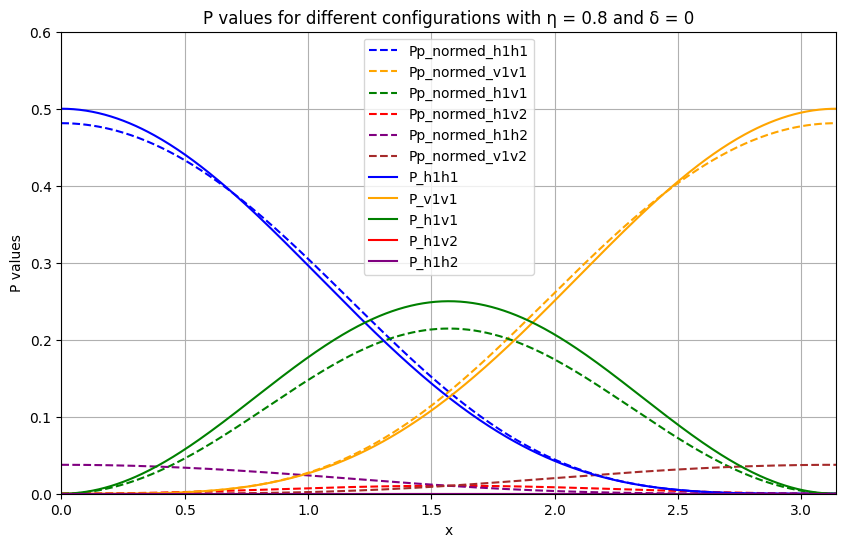

In [53]:
eta_value = 0.8  # Set eta value for numerical evaluation
delta_value = 0  # Set delta value for numerical evaluation

# sub eta and delta values for numerical evaluation
fp_normed_h1h1 = lambdify(x, normalised_Pp_h1h1.subs({eta: eta_value, delta: delta_value}), modules='numpy')
fp_normed_v1v1 = lambdify(x, normalised_Pp_v1v1.subs({eta: eta_value, delta: delta_value}), modules='numpy')
fp_normed_h1v1 = lambdify(x, normalised_Pp_h1v1.subs({eta: eta_value, delta: delta_value}), modules='numpy')
fp_normed_h1v2 = lambdify(x, normalised_Pp_h1v2.subs({eta: eta_value, delta: delta_value}), modules='numpy')
fp_normed_h1h2 = lambdify(x, normalised_Pp_h1h2.subs({eta: eta_value, delta: delta_value}), modules='numpy')
fp_normed_v1v2 = lambdify(x, normalised_Pp_v1v2.subs({eta: eta_value, delta: delta_value}), modules='numpy')

# Generate data for all P values
xp_vals = np.linspace(0, np.pi, 500)
yp_normed_h1h1 = fp_normed_h1h1(x_vals)
yp_normed_v1v1 = fp_normed_v1v1(x_vals)
yp_normed_h1v1 = fp_normed_h1v1(x_vals) 
yp_normed_h1v2 = fp_normed_h1v2(x_vals)
yp_normed_h1h2 = fp_normed_h1h2(x_vals)
yp_normed_v1v2 = fp_normed_v1v2(x_vals)

# Plot all P values
plt.figure(figsize=(10, 6))
plt.plot(x_vals, yp_normed_h1h1, label='Pp_normed_h1h1', color='blue', linestyle='--')
plt.plot(x_vals, yp_normed_v1v1, label='Pp_normed_v1v1', color='orange', linestyle='--')
plt.plot(x_vals, yp_normed_h1v1, label='Pp_normed_h1v1', color='green', linestyle='--')
plt.plot(x_vals, yp_normed_h1v2, label='Pp_normed_h1v2', color='red', linestyle='--')
plt.plot(x_vals, yp_normed_h1h2, label='Pp_normed_h1h2', color='purple', linestyle='--')
plt.plot(x_vals, yp_normed_v1v2, label='Pp_normed_v1v2', color='brown', linestyle='--')

# sub eta and delta values for numerical evaluation
f_h1h1 = lambdify(x, P_h1h1.subs(eta, eta_value), modules='numpy')
f_v1v1 = lambdify(x, P_v1v1.subs(eta, eta_value), modules='numpy')
f_h1v1 = lambdify(x, P_h1v1.subs({eta: eta_value, delta: delta_value}), modules='numpy')
f_h1v2 = lambdify(x, P_h1v2.subs({eta: eta_value, delta: delta_value}), modules='numpy')
f_h1h2 = lambdify(x, P_h1h2.subs(eta, eta_value), modules='numpy')

# Generate data for all P values
x_vals = np.linspace(0, np.pi, 500)
y_h1h1 = f_h1h1(x_vals)
y_v1v1 = f_v1v1(x_vals)
y_h1v1 = f_h1v1(x_vals) 
y_h1v2 = np.zeros(x_vals.shape)  # P_h1v2 is zero for all x
y_h1h2 = np.zeros(x_vals.shape)  # P_h1h2 is zero for all x

# Plot all P values
plt.plot(x_vals, y_h1h1, label='P_h1h1', color='blue')
plt.plot(x_vals, y_v1v1, label='P_v1v1', color='orange')
plt.plot(x_vals, y_h1v1, label='P_h1v1', color='green')
plt.plot(x_vals, y_h1v2, label='P_h1v2', color='red')
plt.plot(x_vals, y_h1h2, label='P_h1h2', color='purple')


plt.xlabel('x')
plt.ylabel('P values')
plt.title('P values for different configurations with η = 0.8 and δ = 0')

plt.xlim(0, np.pi)
plt.ylim(0, 0.6)

plt.legend()
plt.grid(True)
plt.show()


In [54]:
P_c = (
    P_h1v2 +
    + P_h1v2 # P_v1h2
)
P_c = simplify(P_c.expand(trig=True))

Pp_c = (
    normalised_Pp_h1v2
    + normalised_Pp_h1v2 # P_v1h2
    + normalised_Pp_h1h2
    + normalised_Pp_v1v2

)
Pp_c = simplify(Pp_c.expand(trig=True))
Pp_c

(η + 1)**2*(0.5*η**4*sin(x/2)**4 - 0.5*η**4*sin(x/2)**2 + 0.125*η**4*sin(x)**2 + 0.25*η**4 - 2.0*η**2*sin(x/2)**4*sin(δ)**2 + 1.0*η**2*sin(x/2)**4 + 2.0*η**2*sin(x/2)**2*sin(δ)**2 - 1.0*η**2*sin(x/2)**2 + 0.25*η**2*sin(x)**2 - 0.5*η**2 + 0.5*sin(x/2)**4 - 0.5*sin(x/2)**2 + 0.125*sin(x)**2 + 0.25)/(0.5*η**6*sin(x/2)**4 - 0.5*η**6*sin(x/2)**2 + 0.25*η**6*sin(x)**2 + 0.25*η**6 + 1.0*η**5*sin(x/2)**4 - 1.0*η**5*sin(x/2)**2 + 0.5*η**5*sin(x)**2 + 0.5*η**5 - 2.0*η**4*sin(x/2)**4*sin(δ)**2 + 3.5*η**4*sin(x/2)**4 + 2.0*η**4*sin(x/2)**2*sin(δ)**2 - 3.5*η**4*sin(x/2)**2 - 0.5*η**4*sin(x)**2*sin(δ)**2 + 0.75*η**4*sin(x)**2 + 0.75*η**4 - 4.0*η**3*sin(x/2)**4*sin(δ)**2 + 2.0*η**3*sin(x/2)**4 + 4.0*η**3*sin(x/2)**2*sin(δ)**2 - 2.0*η**3*sin(x/2)**2 - 1.0*η**3*sin(x)**2*sin(δ)**2 + 1.0*η**3*sin(x)**2 - 1.0*η**3 - 2.0*η**2*sin(x/2)**4*sin(δ)**2 + 5.5*η**2*sin(x/2)**4 + 2.0*η**2*sin(x/2)**2*sin(δ)**2 - 5.5*η**2*sin(x/2)**2 - 0.5*η**2*sin(x)**2*sin(δ)**2 + 0.75*η**2*sin(x)**2 + 1.75*η**2 + 1.0*η*sin(x/2)

In [55]:
P_db_h = (
    P_h1h1 +
    + P_h1h1 # P_h2h2
)
P_db_h = simplify(P_db_h.expand(trig=True))
Pp_db_h = (
    normalised_Pp_h1h1 +
    + normalised_Pp_h1h1 # P_h2h2
)
Pp_db_h = simplify(Pp_db_h.expand(trig=True))
Pp_db_h


(1.0*η**4 + 2.0*η**2 + 1.0)*cos(x/2)**4/(0.5*η**6*sin(x/2)**4 - 0.5*η**6*sin(x/2)**2 + 0.25*η**6*sin(x)**2 + 0.25*η**6 + 1.0*η**5*sin(x/2)**4 - 1.0*η**5*sin(x/2)**2 + 0.5*η**5*sin(x)**2 + 0.5*η**5 - 2.0*η**4*sin(x/2)**4*sin(δ)**2 + 3.5*η**4*sin(x/2)**4 + 2.0*η**4*sin(x/2)**2*sin(δ)**2 - 3.5*η**4*sin(x/2)**2 - 0.5*η**4*sin(x)**2*sin(δ)**2 + 0.75*η**4*sin(x)**2 + 0.75*η**4 - 4.0*η**3*sin(x/2)**4*sin(δ)**2 + 2.0*η**3*sin(x/2)**4 + 4.0*η**3*sin(x/2)**2*sin(δ)**2 - 2.0*η**3*sin(x/2)**2 - 1.0*η**3*sin(x)**2*sin(δ)**2 + 1.0*η**3*sin(x)**2 - 1.0*η**3 - 2.0*η**2*sin(x/2)**4*sin(δ)**2 + 5.5*η**2*sin(x/2)**4 + 2.0*η**2*sin(x/2)**2*sin(δ)**2 - 5.5*η**2*sin(x/2)**2 - 0.5*η**2*sin(x)**2*sin(δ)**2 + 0.75*η**2*sin(x)**2 + 1.75*η**2 + 1.0*η*sin(x/2)**4 - 1.0*η*sin(x/2)**2 + 0.5*η*sin(x)**2 + 0.5*η + 2.5*sin(x/2)**4 - 2.5*sin(x/2)**2 + 0.25*sin(x)**2 + 1.25)

In [56]:
P_db_v = (
    P_v1v1 +
    + P_v1v1 # P_v2v2
)
P_db_v = simplify(P_db_v.expand(trig=True))
Pp_db_v = (
    normalised_Pp_v1v1 +
    + normalised_Pp_v1v1 # P_v2v2
)
Pp_db_v = simplify(Pp_db_v.expand(trig=True))
Pp_db_v


(1.0*η**4 + 2.0*η**2 + 1.0)*sin(x/2)**4/(0.5*η**6*sin(x/2)**4 - 0.5*η**6*sin(x/2)**2 + 0.25*η**6*sin(x)**2 + 0.25*η**6 + 1.0*η**5*sin(x/2)**4 - 1.0*η**5*sin(x/2)**2 + 0.5*η**5*sin(x)**2 + 0.5*η**5 - 2.0*η**4*sin(x/2)**4*sin(δ)**2 + 3.5*η**4*sin(x/2)**4 + 2.0*η**4*sin(x/2)**2*sin(δ)**2 - 3.5*η**4*sin(x/2)**2 - 0.5*η**4*sin(x)**2*sin(δ)**2 + 0.75*η**4*sin(x)**2 + 0.75*η**4 - 4.0*η**3*sin(x/2)**4*sin(δ)**2 + 2.0*η**3*sin(x/2)**4 + 4.0*η**3*sin(x/2)**2*sin(δ)**2 - 2.0*η**3*sin(x/2)**2 - 1.0*η**3*sin(x)**2*sin(δ)**2 + 1.0*η**3*sin(x)**2 - 1.0*η**3 - 2.0*η**2*sin(x/2)**4*sin(δ)**2 + 5.5*η**2*sin(x/2)**4 + 2.0*η**2*sin(x/2)**2*sin(δ)**2 - 5.5*η**2*sin(x/2)**2 - 0.5*η**2*sin(x)**2*sin(δ)**2 + 0.75*η**2*sin(x)**2 + 1.75*η**2 + 1.0*η*sin(x/2)**4 - 1.0*η*sin(x/2)**2 + 0.5*η*sin(x)**2 + 0.5*η + 2.5*sin(x/2)**4 - 2.5*sin(x/2)**2 + 0.25*sin(x)**2 + 1.25)

In [57]:
P_sb = (
    P_h1v1 +
    + P_h1v1 # P_h2v2
)
P_sb = simplify(P_sb.expand(trig=True))
Pp_sb = (
    normalised_Pp_h1v1 +
    + normalised_Pp_h1v1 # P_h2v2
)
Pp_sb = simplify(Pp_sb.expand(trig=True))
Pp_sb

(η + 1)**2*(0.125*η**4 + 0.25*η**2*cos(2*δ) + 0.125)*sin(x)**2/(0.5*η**6*sin(x/2)**4 - 0.5*η**6*sin(x/2)**2 + 0.25*η**6*sin(x)**2 + 0.25*η**6 + 1.0*η**5*sin(x/2)**4 - 1.0*η**5*sin(x/2)**2 + 0.5*η**5*sin(x)**2 + 0.5*η**5 - 2.0*η**4*sin(x/2)**4*sin(δ)**2 + 3.5*η**4*sin(x/2)**4 + 2.0*η**4*sin(x/2)**2*sin(δ)**2 - 3.5*η**4*sin(x/2)**2 - 0.5*η**4*sin(x)**2*sin(δ)**2 + 0.75*η**4*sin(x)**2 + 0.75*η**4 - 4.0*η**3*sin(x/2)**4*sin(δ)**2 + 2.0*η**3*sin(x/2)**4 + 4.0*η**3*sin(x/2)**2*sin(δ)**2 - 2.0*η**3*sin(x/2)**2 - 1.0*η**3*sin(x)**2*sin(δ)**2 + 1.0*η**3*sin(x)**2 - 1.0*η**3 - 2.0*η**2*sin(x/2)**4*sin(δ)**2 + 5.5*η**2*sin(x/2)**4 + 2.0*η**2*sin(x/2)**2*sin(δ)**2 - 5.5*η**2*sin(x/2)**2 - 0.5*η**2*sin(x)**2*sin(δ)**2 + 0.75*η**2*sin(x)**2 + 1.75*η**2 + 1.0*η*sin(x/2)**4 - 1.0*η*sin(x/2)**2 + 0.5*η*sin(x)**2 + 0.5*η + 2.5*sin(x/2)**4 - 2.5*sin(x/2)**2 + 0.25*sin(x)**2 + 1.25)

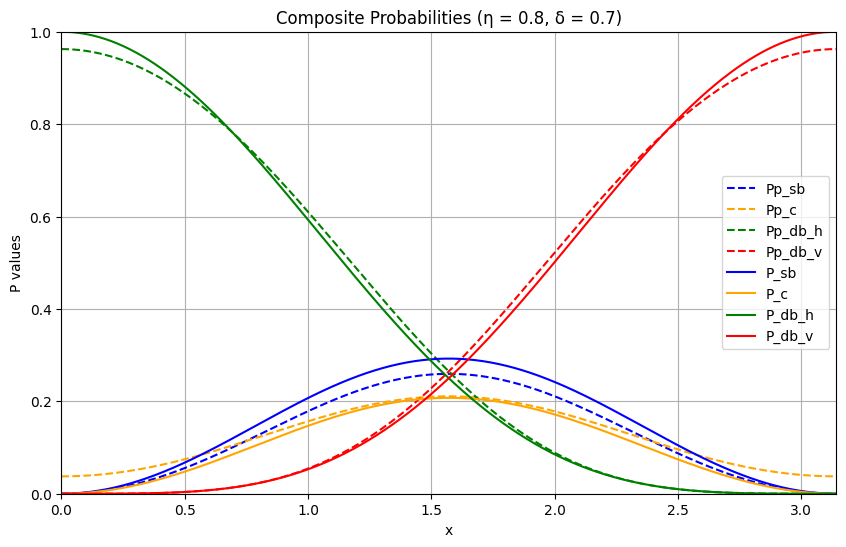

In [58]:

# Use consistent eta and delta values
eta_value = 0.8
delta_value = 0.7

# Define x_vals
x_vals = np.linspace(0, np.pi, 500)

# Imperfect overlap versions
fp_sb = lambdify(x, Pp_sb.subs({eta: eta_value, delta: delta_value}), modules='numpy')
fp_c = lambdify(x, Pp_c.subs({eta: eta_value, delta: delta_value}), modules='numpy')
fp_db_h = lambdify(x, Pp_db_h.subs({eta: eta_value, delta: delta_value}), modules='numpy')
fp_db_v = lambdify(x, Pp_db_v.subs({eta: eta_value, delta: delta_value}), modules='numpy')

yp_sb = fp_sb(x_vals)
yp_c = fp_c(x_vals)
yp_db_h = fp_db_h(x_vals)
yp_db_v = fp_db_v(x_vals)

# Perfect overlap versions
f_sb = lambdify(x, P_sb.subs({eta: eta_value, delta: delta_value}), modules='numpy')
f_c = lambdify(x, P_c.subs({eta: eta_value, delta: delta_value}), modules='numpy')
f_db_h = lambdify(x, P_db_h.subs({eta: eta_value, delta: delta_value}), modules='numpy')
f_db_v = lambdify(x, P_db_v.subs({eta: eta_value, delta: delta_value}), modules='numpy')

y_sb = f_sb(x_vals)
y_c = f_c(x_vals)  # P_c is zero for all x
y_db_h = f_db_h(x_vals)
y_db_v = f_db_v(x_vals)

# Plot
plt.figure(figsize=(10, 6))

# Normalized (dashed)
plt.plot(x_vals, yp_sb, label='Pp_sb', linestyle='--', color='blue')
plt.plot(x_vals, yp_c, label='Pp_c', linestyle='--', color='orange')
plt.plot(x_vals, yp_db_h, label='Pp_db_h', linestyle='--', color='green')
plt.plot(x_vals, yp_db_v, label='Pp_db_v', linestyle='--', color='red')

# Unnormalized (solid)
plt.plot(x_vals, y_sb, label='P_sb', color='blue')
plt.plot(x_vals, y_c, label='P_c', color='orange')
plt.plot(x_vals, y_db_h, label='P_db_h', color='green')
plt.plot(x_vals, y_db_v, label='P_db_v', color='red')

plt.xlabel('x')
plt.ylabel('P values')
plt.title(f'Composite Probabilities (η = {eta_value}, δ = {delta_value})')
plt.xlim(0, np.pi)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


In [79]:
# construct a dataframe with all the imperfect overlap probabilities for different eta values

eta_range = np.linspace(0.8, 1, 41, endpoint=True)
delta_value = 0

# Create a DataFrame to store results
results = pd.DataFrame(columns=['eta', 'theta', 'p_sb', 'p_c', 'p_db_h', 'p_db_v'])

for eta_value in eta_range:
    # Imperfect overlap versions
    fp_sb = lambdify(x, Pp_sb.subs({eta: eta_value, delta: delta_value}), modules='numpy')
    fp_c = lambdify(x, Pp_c.subs({eta: eta_value, delta: delta_value}), modules='numpy')
    fp_db_h = lambdify(x, Pp_db_h.subs({eta: eta_value, delta: delta_value}), modules='numpy')
    fp_db_v = lambdify(x, Pp_db_v.subs({eta: eta_value, delta: delta_value}), modules='numpy')

    # Generate data for all P values
    yp_sb = fp_sb(x_vals)
    yp_c = fp_c(x_vals)
    yp_db_h = fp_db_h(x_vals)
    yp_db_v = fp_db_v(x_vals)

    # Append results to the DataFrame
    new_df = pd.DataFrame({
        'eta': eta_value,
        'delta': delta_value,
        'theta': x_vals,
        'p_sb': yp_sb,
        'p_c': yp_c,
        'p_db_h': yp_db_h,
        'p_db_v': yp_db_v
    })

    results = pd.concat([results, new_df], ignore_index=True)

# Convert results to a DataFrame and explode the arrays
results.to_csv('imperfect_overlap_probabilities.csv', index=False)
results['eta'].unique()


/tmp/ipykernel_754426/534240237.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_df], ignore_index=True)


array([0.8  , 0.805, 0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 ,
       0.845, 0.85 , 0.855, 0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885,
       0.89 , 0.895, 0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 ,
       0.935, 0.94 , 0.945, 0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975,
       0.98 , 0.985, 0.99 , 0.995, 1.   ])